# Dados Utilizados

Utilizamos dados da billboard e do spotify para fazer uma análise das músicas mais populares.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratando os dados

Começamos selecionando as colunas que vamos usar e depois filtrando as linhas que possuem dados faltantes.

In [35]:
songs = pd.read_csv('../dataset/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')

songs = songs[['date', 'title', 'artist', 'peak_pos', 'last_pos', 'weeks', 'rank', 'genre', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key','duration_ms', 'loudness', 'valence', 'mode']]

# Removendo na
songs = songs.dropna()

In [37]:
songs.head()

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[u'rap'],0.529,0.0856,...,0.3070,0.0769,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.203,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[u'pop rap', u'rap']",0.308,0.0933,...,0.3380,0.1250,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.265,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[u'dance pop', u'pop', u'post-teen pop']",0.724,0.1200,...,0.0486,0.0945,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.508,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[u'pop', u'rap']",0.568,0.0952,...,0.4110,0.0256,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.535,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[u'contemporary country', u'country road']",0.402,0.0928,...,0.0262,0.6760,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.382,1.0


Podemos observar que os gêneros não estão processáveis. Como faremos uma análise de gênero, será importante que eles estejam padronizados. Assim, vamos realizar um one-hot encoding dos gêneros mais relevantes.

In [39]:
#transforma gêneros para formato de lista

for value in df['genre'].values:
    value = value.replace("u'", "")
    value = value.replace("'", "")
    value = value.replace("[", "")
    value = value.replace("]", "")
    
    song_genres = value.split(", ")

songs_with_genres = songs.copy()
    
songs_with_genres['genre'] = genres
songs_with_genres

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[rap],0.529,0.0856,...,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[pop rap, rap]",0.308,0.0933,...,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[dance pop, pop, post-teen pop]",0.724,0.1200,...,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[pop, rap]",0.568,0.0952,...,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[contemporary country, country road]",0.402,0.0928,...,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
9,6/21/18,Better Now,Post Malone,7,34,7,20,"[pop, rap]",0.563,0.1360,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,Boo'd Up,Ella Mai,6,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,0.0780,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,Call Out My Name,The Weeknd,4,52,11,54,"[canadian pop, pop, rap]",0.599,0.3270,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,Chun-Li,Nicki Minaj,10,46,10,43,"[dance pop, hip pop, pop, pop rap, rap]",0.766,0.1070,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
14,6/21/18,Cudi Montage,KIDS SEE GHOSTS,69,0,1,69,"[hip hop, pop, pop rap, rap]",0.504,0.1210,...,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


In [53]:
#recupera gêneros únicos

def get_unique_genres(songs):
    unique_genres = {}
      
    for genres in songs['genre']:
        for genre in genres:
            if genre in unique_genres:
                unique_genres[genre] += 1
            else:
                unique_genres[genre] = 1
    
    unique_genres = pd.DataFrame.from_dict(unique_genres, orient='index')
    unique_genres.sort_values(by=0, ascending=False, inplace=True)
    unique_genres.reset_index(level=0, inplace=True)
    unique_genres.columns = ['genre', 'quantity']
    
    return unique_genres

unique_genres = get_unique_genres(songs_with_genres)
unique_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


Fazendo a análise dos gêneros, podemos observar que muitos deles tem poucas músicas no Top 100. Isso é mostrado no histograma:

(array([367.,   7.,   3.,   6.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([1.0000e+00, 3.1230e+02, 6.2360e+02, 9.3490e+02, 1.2462e+03,
        1.5575e+03, 1.8688e+03, 2.1801e+03, 2.4914e+03, 2.8027e+03,
        3.1140e+03]),
 <a list of 10 Patch objects>)

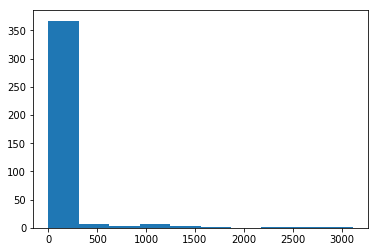

In [56]:
plt.hist(unique_genres['quantity'])

Assim, vamos criar uma lista apenas com os gêneros relevantes a partir de um número arbitrário, definido como pelo menos 5% da quantidade original de músicas.

In [68]:
def get_relevant_genres(songs, unique_genres):
    unique_genres.sort_values(by='quantity', ascending=False, inplace=True)
    return unique_genres[unique_genres['quantity'] >= songs.shape[0]*0.05]

relevant_genres = get_relevant_genres(songs_with_genres, unique_genres)
relevant_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


De posse dos nossos gêneros relevantes, conseguimos fazer o one-hot encoding da tabela.

In [95]:
#retorna lista de one-encoding por gênero
def genre_one_hot_encoding(songs_with_genres, genre):
    one_hot_encoding = songs_with_genres.genre.map(set([genre]).issubset)
    return list(one_hot_encoding.map({False:0, True:1}))

In [96]:
#itera sobre os gêneros adicionando colunas ao nosso dataframe de músicas para tratá-los como dados classificatórios
def one_hot_encoding(songs_with_genres, relevant_genres):  
    songs_one_hot_encoding = dfWithGenreList[['peak_pos', 'weeks', 'rank', 'genre']]

    for i in range(relevant_genres.shape[0]):
        songs_one_hot_encoding.insert(i+4, relevant_genres['genre'][i], genre_one_hot_encoding(songs_with_genres, relevant_genres['genre'][i]))

    return songs_one_hot_encoding 

songs_one_hot_encoding = one_hot_encoding(songs_with_genres, relevant_genres)
songs_one_hot_encoding

,peak_pos,weeks,rank,genre,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,urban contemporary,trap music,hip pop,dirty south rap,pop rock,modern country rock,gangster rap,neo mellow,neo soul,post-grunge
1,41,5,41,[rap],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,2,31,"[pop rap, rap]",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,5,22,"[dance pop, pop, post-teen pop]",1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,11,11,23,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,4,93,"[contemporary country, country road]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7,7,20,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,4,11,54,"[canadian pop, pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,10,10,43,"[dance pop, hip pop, pop, pop rap, rap]",1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
14,69,1,69,"[hip hop, pop, pop rap, rap]",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#agrupa por gênero para tirar estatísticas
def agruparGeneros(generos_relevantes, dfGenreRank):    
    estatisticas_generos = {}
    for i in range(generos_relevantes.shape[0]):
        genero = generos_relevantes.index.values[i]
        df_genero = dfGenreRank[['peak_pos', 'weeks', 'rank', genero]]
        group_genero = df_genero[df_genero[genero] == True]
        group_genero = group_genero.mean()[['peak_pos', 'weeks', 'rank']]

        estatisticas_generos[genero] = group_genero

    return pd.DataFrame.from_dict(estatisticas_generos, orient='index')

generos_relevantes, dfGenreRank = tratarGeneros(dfWithGenreList)

estatisticas_generos = agruparGeneros(generos_relevantes, dfGenreRank)
estatisticas_generos

,peak_pos,weeks,rank
contemporary country,50.824281,15.753994,81.789137
country,50.308492,16.003466,82.419411
country road,50.912078,15.943162,82.215808
dance pop,40.623836,14.080819,71.757914
dirty south rap,46.360778,13.711078,76.851796
gangster rap,48.258333,13.180000,78.558333
hip hop,46.922097,12.519101,76.298127
hip pop,40.816857,15.969823,75.122789
modern country rock,54.047771,15.581210,82.821656
neo mellow,44.609053,17.162551,72.960905


In [12]:
estatisticas_generos.sort_values(by='peak_pos')

,peak_pos,weeks,rank
r&b,39.892157,15.884615,73.469080
urban contemporary,40.230843,15.851533,74.700192
dance pop,40.623836,14.080819,71.757914
hip pop,40.816857,15.969823,75.122789
post-teen pop,41.799104,12.564299,70.654511
pop,43.246949,13.445087,71.406230
pop rock,43.919877,17.137134,74.556240
neo mellow,44.609053,17.162551,72.960905
pop rap,44.671513,13.832349,74.493412
dirty south rap,46.360778,13.711078,76.851796


In [13]:
estatisticas_generos.sort_values(by='rank')

,peak_pos,weeks,rank
post-teen pop,41.799104,12.564299,70.654511
pop,43.246949,13.445087,71.406230
dance pop,40.623836,14.080819,71.757914
neo mellow,44.609053,17.162551,72.960905
r&b,39.892157,15.884615,73.469080
pop rap,44.671513,13.832349,74.493412
pop rock,43.919877,17.137134,74.556240
urban contemporary,40.230843,15.851533,74.700192
rap,47.416302,12.429431,75.063457
hip pop,40.816857,15.969823,75.122789


In [14]:
estatisticas_generos.sort_values(by='weeks', ascending=False)

,peak_pos,weeks,rank
neo mellow,44.609053,17.162551,72.960905
pop rock,43.919877,17.137134,74.556240
post-grunge,51.387409,16.704600,78.532688
country,50.308492,16.003466,82.419411
hip pop,40.816857,15.969823,75.122789
country road,50.912078,15.943162,82.215808
r&b,39.892157,15.884615,73.469080
urban contemporary,40.230843,15.851533,74.700192
contemporary country,50.824281,15.753994,81.789137
modern country rock,54.047771,15.581210,82.821656


Assim, pelos três atributos analisados, podemos perceber algumas características: músicas que contém o estilo r&b, urban contemporary, dance pop e hip hop atingem posições mais altas no ranking. Porém, em geral, músicas pop (post-teen pop, pop e dance pop) permanecem em colocações mais altas durante a permanência. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock são os mais altos, ficando em média 17 semanas no topo.

Agora, precisamos analisar se essas informações são ou não determinísticos. Vamos começar analisando a amostra das músicas que atingiram as 10 primeiras posições do ranking.

In [15]:
dfTop10 = dfWithGenreList[dfWithGenreList['peak_pos'] < 11]
dfTop10

,date,title,artist,peak_pos,last_pos,weeks,rank,change,genre,energy,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
9,6/21/18,Better Now,Post Malone,7,34,7,20,14,"[pop, rap]",0.563,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,Boo'd Up,Ella Mai,6,6,11,7,-1,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,Call Out My Name,The Weeknd,4,52,11,54,-2,"[canadian pop, pop, rap]",0.599,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,Chun-Li,Nicki Minaj,10,46,10,43,3,"[dance pop, hip pop, pop, pop rap, rap]",0.766,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
23,6/21/18,Fake Love,BTS,10,48,4,71,-23,[k-pop],0.719,...,0.0372,0.002670,0.000000,4.0,0.557,2.0,242334.0,-4.515,0.3440,0.0
32,6/21/18,God's Plan,Drake,1,5,21,4,1,"[canadian hip hop, canadian pop, hip hop, pop ...",0.449,...,0.1090,0.033200,0.000083,4.0,0.754,7.0,198973.0,-9.211,0.3570,1.0
45,6/21/18,KOD,J. Cole,10,60,8,65,-5,"[conscious hip hop, pop, pop rap, rap]",0.782,...,0.1500,0.210000,0.000000,4.0,0.831,0.0,191437.0,-6.274,0.1990,1.0
51,6/21/18,Lucid Dreams,Juice WRLD,6,9,5,6,3,[rap],0.566,...,0.2000,0.349000,0.000000,4.0,0.511,6.0,239836.0,-7.230,0.2180,0.0
56,6/21/18,Never Be The Same,Camila Cabello,6,18,26,19,-1,"[dance pop, pop, post-teen pop]",0.713,...,0.0747,0.181000,0.000637,4.0,0.637,0.0,226973.0,-4.333,0.2430,1.0
57,6/21/18,New Rules,Dua Lipa,6,40,46,35,5,[pop],0.700,...,0.0694,0.002610,0.000016,4.0,0.762,9.0,209320.0,-6.021,0.6080,0.0


In [16]:
generos_relevantes, dfGenreRank = tratarGeneros(dfTop10)
musicasTop10 = agruparGeneros(generos_relevantes, dfGenreRank)
musicasTop10

,peak_pos,weeks,rank
dance pop,4.474085,26.321646,49.211890
dirty south rap,4.813008,24.056911,48.813008
gangster rap,4.881188,23.990099,51.069307
hip hop,4.512605,24.516807,50.802521
hip pop,4.343891,25.773756,49.162896
neo mellow,5.128571,37.314286,48.000000
neo soul,4.846154,26.861538,50.938462
pop,4.451852,27.600000,48.025185
pop rap,4.523918,26.066059,48.250569
pop rock,5.160377,34.679245,50.141509


In [17]:
musicasTop10.sort_values(by='peak_pos')

,peak_pos,weeks,rank
urban contemporary,4.184211,25.744361,49.003759
r&b,4.256637,26.430678,49.412979
hip pop,4.343891,25.773756,49.162896
pop,4.451852,27.600000,48.025185
post-teen pop,4.469444,26.780556,50.094444
dance pop,4.474085,26.321646,49.211890
hip hop,4.512605,24.516807,50.802521
pop rap,4.523918,26.066059,48.250569
rap,4.677632,24.506579,48.914474
southern hip hop,4.765625,25.296875,48.442708


In [18]:
musicasTop10.sort_values(by='rank')

,peak_pos,weeks,rank
trap music,5.162791,24.596899,46.620155
neo mellow,5.128571,37.314286,48.000000
pop,4.451852,27.600000,48.025185
pop rap,4.523918,26.066059,48.250569
southern hip hop,4.765625,25.296875,48.442708
dirty south rap,4.813008,24.056911,48.813008
rap,4.677632,24.506579,48.914474
urban contemporary,4.184211,25.744361,49.003759
hip pop,4.343891,25.773756,49.162896
dance pop,4.474085,26.321646,49.211890


In [19]:
musicasTop10.sort_values(by='weeks', ascending=False)

,peak_pos,weeks,rank
neo mellow,5.128571,37.314286,48.000000
pop rock,5.160377,34.679245,50.141509
pop,4.451852,27.600000,48.025185
neo soul,4.846154,26.861538,50.938462
post-teen pop,4.469444,26.780556,50.094444
r&b,4.256637,26.430678,49.412979
dance pop,4.474085,26.321646,49.211890
pop rap,4.523918,26.066059,48.250569
hip pop,4.343891,25.773756,49.162896
urban contemporary,4.184211,25.744361,49.003759


Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking. A média do rank porém não foi semelhante. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock também continuam os mais altos.

Assim, agora vamos analisar se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso.

Partiremos para os testes de hipóteses
SALVAR DADOS LIMPOS

In [28]:
generos_relevantes

,0
pop,675
dance pop,656
pop rap,439
post-teen pop,360
r&b,339
rap,304
urban contemporary,266
hip hop,238
hip pop,221
southern hip hop,192


In [30]:
dfWithGenreList.to_csv('../dataset/songs_with_genre.csv', index=False)
dfGenreRank.to_csv('../dataset/songs_one_hot_encoding.csv', index=False)
generos_relevantes.to_csv('../dataset/genres_relevant.csv', index=False)